# requirments:

- scikit-learn              1.0.2  
- python                    3.9.17 
- matplotlib                3.7.1 
- numpy                     1.24.3 
- pandas                    1.5.3


# Permeance prediction

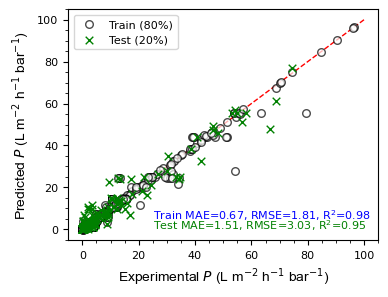

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib
from sklearn.ensemble import GradientBoostingRegressor
import  matplotlib
from matplotlib.ticker import AutoMinorLocator   #minor tick

plt.style.use('default')
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
matplotlib.rc('legend', fontsize=8)

####-------------load ML model and dataset-----------

savedmodel = joblib.load('rdkitdp_gbr_p.sav')
data =  pd.read_csv('ML_OSN_rdkitdp.csv',header=0)  ##

data0=data[pd.isnull(data['permeance'])==False]
data=data0.drop(columns=['solute_MW','solute_conc','charge','permeance','rejection']) ## remove solute related
X_origin= data.iloc[:,6:].values
scale0 = preprocessing.StandardScaler().fit(X_origin)
X = scale0.transform(X_origin)
Y=data0['permeance'].values         
X_train, X_test, y_train, y_test = train_test_split( X,Y, test_size=0.2, random_state=45)

####-------------plot-----------

f,ax = plt.subplots(figsize=(4,3))
xx= np.linspace(y_train.min(),y_train.max()+0.05,100)
ax.plot([0,100],[0,100],'--',color='red',linewidth=1,zorder=1)
ax.scatter(y_train,savedmodel.predict(X_train),marker='o',s=30,linewidth=1.0,edgecolor='black',label='Train (80%)',color='white',zorder=2,alpha=0.7)
ax.scatter(y_test,savedmodel.predict(X_test),marker='x',s=30,linewidth=1.0,label='Test (20%)',color='green',zorder=3,alpha=1)
ax.text(25,5,"Train MAE=%.2f, RMSE=%.2f, R$^2$=%.2f" %(mean_absolute_error(y_train, savedmodel.predict(X_train)), np.sqrt(mean_squared_error(y_train, savedmodel.predict(X_train))),r2_score(y_train,savedmodel.predict(X_train))) ,fontsize=8,color='blue')
ax.text(25,0,"Test MAE=%.2f, RMSE=%.2f, R$^2$=%.2f" %(mean_absolute_error(y_test, savedmodel.predict(X_test)),np.sqrt(mean_squared_error(y_test, savedmodel.predict(X_test))),r2_score(y_test,savedmodel.predict(X_test))),fontsize=8,color='green')
ax.set_xlabel('Experimental $P$ (L m$^{-2}$ h$^{-1}$ bar$^{-1}$)',fontname="Arial",fontsize=10)
ax.set_ylabel('Predicted $P$ (L m$^{-2}$ h$^{-1}$ bar$^{-1}$)',fontname="Arial",fontsize=10)
ax.legend(frameon=True)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.show()


# Rejection prediction

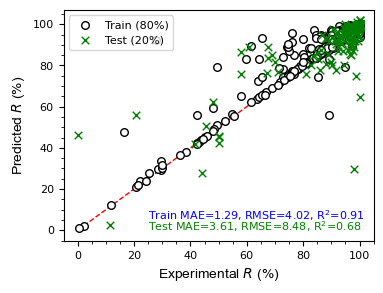

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib
from sklearn.ensemble import GradientBoostingRegressor
import  matplotlib
from matplotlib.ticker import AutoMinorLocator   #minor tick

plt.style.use('default')
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
matplotlib.rc('legend', fontsize=8)

####-------------load ML model and dataset-----------

savedmodel = joblib.load('rdkitdp_gbr_r.sav')
data =  pd.read_csv('ML_OSN_rdkitdp.csv',header=0)  ##
data0=data[pd.isnull(data['rejection'])==False]
data=data0.drop(columns=['permeance','rejection']) ## remove solute related
X_origin= data.iloc[:,6:].values
scale0 = preprocessing.StandardScaler().fit(X_origin)
X = scale0.transform(X_origin)
Y=data0['rejection'].values          # use prinstine flux values
X_train, X_test, y_train, y_test = train_test_split( X,Y, test_size=0.2, random_state=46)

####---------------plot--------------

f,ax = plt.subplots(figsize=(4,3))
xx= np.linspace(y_train.min(),y_train.max()+0.05,100)
ax.plot([0,100],[0,100],'--',color='red',linewidth=1,zorder=1)
ax.scatter(y_train,savedmodel.predict(X_train),marker='o',s=30,linewidth=1.0,edgecolor='black',label='Train (80%)',color='white',zorder=2,alpha=1)
ax.scatter(y_test,savedmodel.predict(X_test),marker='x',s=30,linewidth=1.0,label='Test (20%)',color='green',zorder=3,alpha=1)
ax.text(25,5,"Train MAE=%.2f, RMSE=%.2f, R$^2$=%.2f" %(mean_absolute_error(y_train, savedmodel.predict(X_train)), np.sqrt(mean_squared_error(y_train, savedmodel.predict(X_train))),r2_score(y_train,savedmodel.predict(X_train))) ,fontsize=8,color='blue')
ax.text(25,0,"Test MAE=%.2f, RMSE=%.2f, R$^2$=%.2f" %(mean_absolute_error(y_test, savedmodel.predict(X_test)),np.sqrt(mean_squared_error(y_test, savedmodel.predict(X_test))),r2_score(y_test,savedmodel.predict(X_test))),fontsize=8,color='green')
ax.set_xlabel('Experimental $R$ (%)',fontname="Arial",fontsize=10)
ax.set_ylabel('Predicted $R$ (%)',fontname="Arial",fontsize=10)
ax.legend(frameon=True,loc=2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.show()
